# Seção 14.13 - Regressão com Redes Neurais (base preço casas)
Para esta seção, usarei a base de dados house_prices.csv do curso do Prof. Jones Granatyr.

# Pontos importantes da regressão com redes neurais:
1. Teremos somente um neurônio na saída.
2. A função de ativação linear no neurônio de saída tem bons resultados.
3. A função de ativação RELU nos neurônios das camadas ocultas tem bons resultados.

In [2]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import (show,
                      output_notebook)
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosta!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             classification_report)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [3]:
nomeDaBase = "../bases/house-prices.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8", index_col="id")

In [4]:
df.head(5).T

id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,3,5,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.5+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


### Breve análise da  base:
- não há nulos;
- existem 21 variáveis, 20 variáveis independentes e a variável dependente, price; e
- só há uma variável "não numérica", a date.

### Próximos passos:
- apenas para simplificação, não usarei o atributo *date* nesta análise; e
- farei um diagrama de correlação para encontrar o atributo com maior correlação com price.

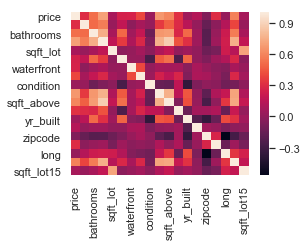

In [7]:
sns.set()
dimensoes = (4,3)
fig, ax = plt.subplots(figsize=dimensoes)
sns.heatmap(df.corr())

In [8]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [9]:
df.corr()[abs(df.corr()["price"]) > .5]["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
Name: price, dtype: float64

In [10]:
# Separando os fatores/previsores da resposta/target:

x = df.drop(["price", "date"], axis=1).values
y = df["price"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
# IMPORTANTE! Tive que fazer um reshape nos valores de x e y.

## Escalonando

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [12]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor()

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# IMPORTANTE!
## Desfazendo a transformação

Após o cálculo da previsão, devemos desfazer a transformação (escalonamento) realizado para que o valor faça sentido.

In [14]:
y_test = scaler_y.inverse_transform(y_test)
y_pred = scaler_y.inverse_transform(y_pred)

### Verificando o como o modelo se saiu

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MSE: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("MAE: {:.3f}".format(mean_absolute_error(y_test, y_pred)))
# print("MAPE:, ", mean_absolute_percentage_error(y_test, y_pred))
print("R2: {:.3f}".format(r2_score(y_test, y_pred)))

################################################################################
# Cálculo do R2 ajustado:
def r2_ajustado(x, y, y_pred):
    """
    r2_ajustado retorna o R² Ajustado e recebe como argumento as séries com o
    valor alvo teste e o predito.
    """
    n = x.shape[0]
    k = x.shape[1]
    return (1-((n-1)/(n-(k+1)))*(1-r2_score(y, y_pred)))
################################################################################

print("R2 Ajustado: {:.3}".format(r2_ajustado(x_test, y_test, y_pred)))

MSE: 15868063094.210
RMSE: 125968.500
MAE: 75017.841
R2: 0.881
R2 Ajustado: 0.88
